<a href="https://colab.research.google.com/github/dekshitha/Project--Payment-Risk-Shield/blob/ml/PRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up environment

In [2]:
!pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=945227000bccea2b6e93cca1186ca8e08536da053761efe44063d9c72b7718cb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import sys
import ydata_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from scipy.stats import norm, skew
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras import models, layers
# Tensforflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

Loading Dataset


In [7]:
data=pd.read_csv('/content/sample_data/payment.csv')
data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,29-01-19 22:05,3.550000e+15,"fraud_Parisian, Schiller and Altenwerth",misc_net,666.70,Cody,Blake,M,300 Hodge Loaf,...,29.7396,-95.4460,2906700,Community development worker,14-03-62,5ea472d933561e36dcad710839b9ed6b,1327874723,29.806815,-95.377033,1
1,2,06-01-19 15:25,3.520000e+15,"fraud_Hagenes, Kohler and Hoppe",food_dining,1.93,Micheal,Walters,M,15315 Vaughn Park Suite 356,...,47.8342,-90.0476,272,Freight forwarder,05-07-01,fb373b76f05670ce23402ace28650dfb,1325863529,46.835966,-89.251001,0
2,3,13-01-19 17:49,3.760000e+14,fraud_Kilback LLC,food_dining,23.03,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,11-02-82,06f5d997085b59dda6dbf1ae2ed33b71,1326476990,41.938008,-101.775582,0
3,4,03-04-19 23:48,5.140000e+15,"fraud_Streich, Dietrich and Barton",shopping_net,994.00,Dakota,Fowler,M,16220 Joseph Point Suite 096,...,36.4657,-81.8140,13021,Tree surgeon,17-07-01,db194959b156dee693d5599a2ec54382,1333496912,37.324006,-80.905928,1
4,5,08-01-19 15:12,3.550000e+15,fraud_Kuhic LLC,shopping_net,194.94,Sara,Harris,F,597 Jenny Ford Apt. 543,...,44.2320,-74.4905,6120,Chartered loss adjuster,09-10-76,69bf1ad18f8c2b366ffe8d7d8a55cf29,1326035535,44.126948,-74.685703,0


Data cleaning and pre-processing



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             36000 non-null  int64  
 1   trans_date_trans_time  36000 non-null  object 
 2   cc_num                 36000 non-null  float64
 3   merchant               36000 non-null  object 
 4   category               36000 non-null  object 
 5   amt                    36000 non-null  float64
 6   first                  36000 non-null  object 
 7   last                   36000 non-null  object 
 8   gender                 36000 non-null  object 
 9   street                 36000 non-null  object 
 10  city                   36000 non-null  object 
 11  state                  36000 non-null  object 
 12  zip                    36000 non-null  int64  
 13  lat                    36000 non-null  float64
 14  long                   36000 non-null  float64
 15  ci

In [9]:
data.nunique()


Unnamed: 0               36000
trans_date_trans_time    22739
cc_num                     320
merchant                   693
category                    14
amt                      17206
first                      348
last                       479
gender                       2
street                     965
city                       879
state                       51
zip                        952
lat                        950
long                       951
city_pop                   865
job                        493
dob                        950
trans_num                36000
unix_time                35650
merch_lat                35960
merch_long               35981
is_fraud                     2
dtype: int64

In [11]:
print("NULL values:\n", data.isnull().sum())

NULL values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [12]:
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


In [17]:
# Adding Age feature from dob and transaction date

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

# Calculate age in years and convert to integer
data['age'] = abs((data['trans_date_trans_time'] - data['dob']) / np.timedelta64(1, 'Y')).astype(int)


In [18]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,1,2019-01-29 22:05:00,3.550000e+15,"fraud_Parisian, Schiller and Altenwerth",misc_net,666.70,Cody,Blake,M,300 Hodge Loaf,...,-95.4460,2906700,Community development worker,2062-03-14,5ea472d933561e36dcad710839b9ed6b,1327874723,29.806815,-95.377033,1,43
1,2,2019-06-01 15:25:00,3.520000e+15,"fraud_Hagenes, Kohler and Hoppe",food_dining,1.93,Micheal,Walters,M,15315 Vaughn Park Suite 356,...,-90.0476,272,Freight forwarder,2001-05-07,fb373b76f05670ce23402ace28650dfb,1325863529,46.835966,-89.251001,0,18
2,3,2019-01-13 17:49:00,3.760000e+14,fraud_Kilback LLC,food_dining,23.03,Rachel,Lowe,F,372 Jeffrey Course,...,-101.1360,1789,Insurance broker,1982-11-02,06f5d997085b59dda6dbf1ae2ed33b71,1326476990,41.938008,-101.775582,0,36
3,4,2019-03-04 23:48:00,5.140000e+15,"fraud_Streich, Dietrich and Barton",shopping_net,994.00,Dakota,Fowler,M,16220 Joseph Point Suite 096,...,-81.8140,13021,Tree surgeon,2001-07-17,db194959b156dee693d5599a2ec54382,1333496912,37.324006,-80.905928,1,17
4,5,2019-08-01 15:12:00,3.550000e+15,fraud_Kuhic LLC,shopping_net,194.94,Sara,Harris,F,597 Jenny Ford Apt. 543,...,-74.4905,6120,Chartered loss adjuster,1976-09-10,69bf1ad18f8c2b366ffe8d7d8a55cf29,1326035535,44.126948,-74.685703,0,42


Dropping unnecessary features


In [19]:
#columns_to_drop = ["Unnamed: 0", "cc_num"]
columns_to_drop = ["Unnamed: 0","first","last","trans_num","cc_num"]
data.drop(columns=columns_to_drop, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  36000 non-null  datetime64[ns]
 1   merchant               36000 non-null  object        
 2   category               36000 non-null  object        
 3   amt                    36000 non-null  float64       
 4   gender                 36000 non-null  object        
 5   street                 36000 non-null  object        
 6   city                   36000 non-null  object        
 7   state                  36000 non-null  object        
 8   zip                    36000 non-null  int64         
 9   lat                    36000 non-null  float64       
 10  long                   36000 non-null  float64       
 11  city_pop               36000 non-null  int64         
 12  job                    36000 non-null  object        
 13  d

Corrlation Matrix between all
features


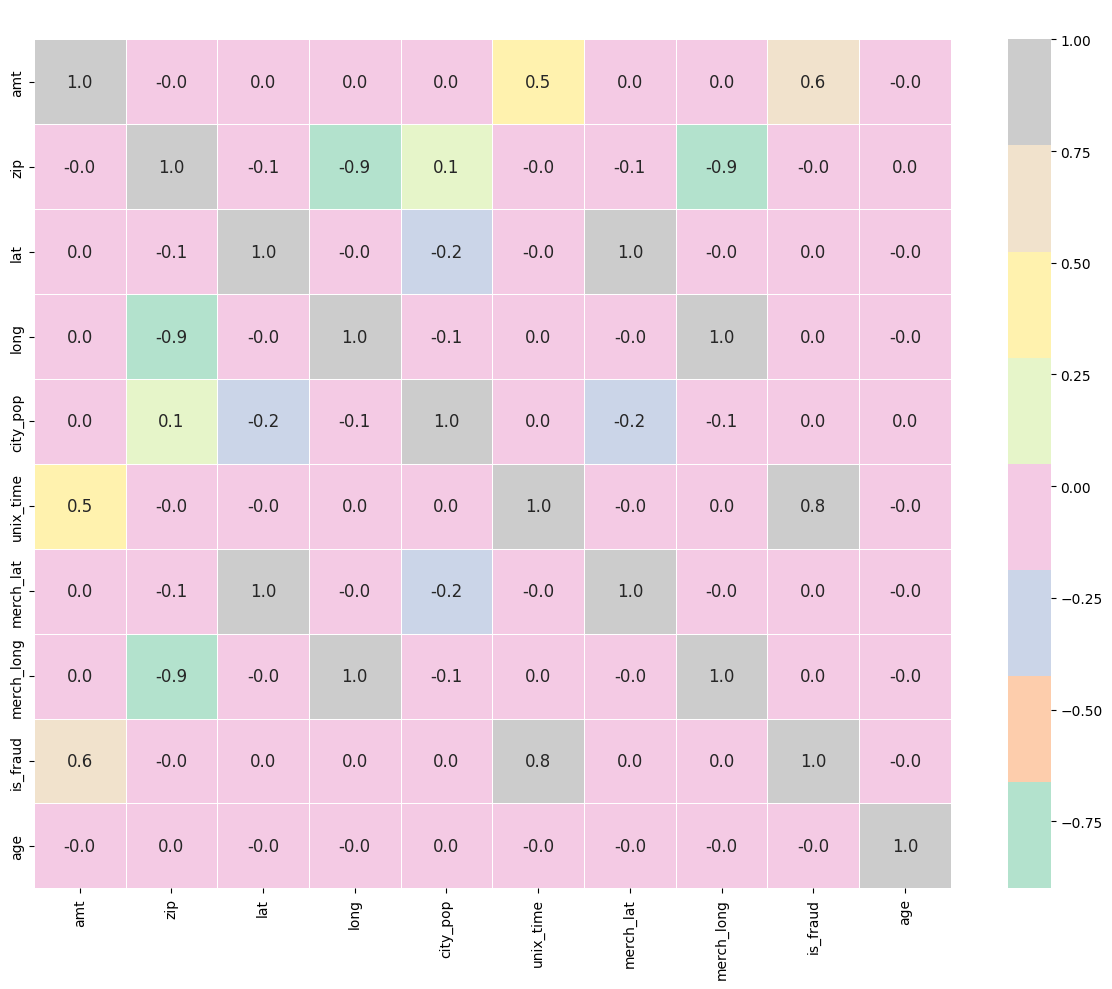

In [22]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix and round to 1 decimal place
corr = numeric_data.corr().round(1)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, cmap='Pastel2', fmt='.1f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Credit Card Fraud - Correlation Heatmap", color="white", size=20)
plt.tight_layout()
plt.show()

In [ ]:
# Lighter colors (pale yellow in the 'Pastel2' colormap) indicate weaker correlations (close to 0).
# Darker colors (darker shades in 'Pastel2') indicate stronger correlations (close to -1 or 1).


Scaling data


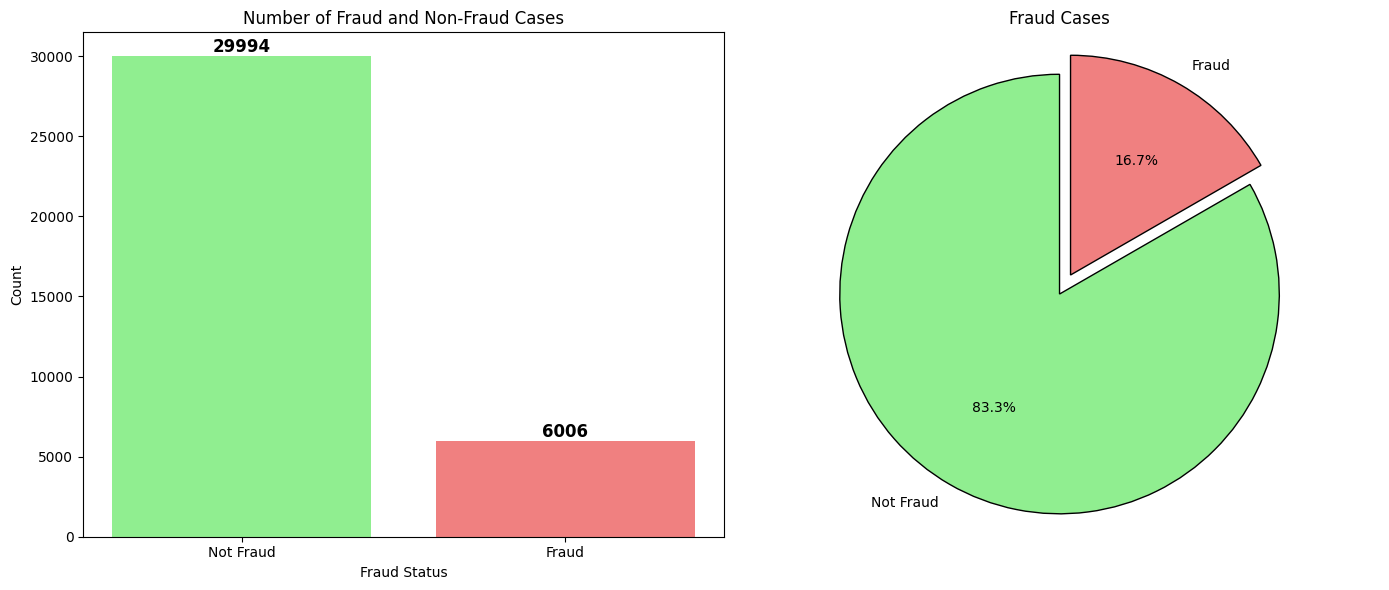

In [29]:
# Number of Fraud and Not-Fraud Cases
# Count the number of fraud cases
fraud_counts = data["is_fraud"].value_counts()
fraud_labels = fraud_counts.index.tolist()
fraud_values = fraud_counts.tolist()

# Create a figure with one row and two columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar chart on the first subplot (axes[0])
axes[0].bar(['Not Fraud', 'Fraud'], fraud_values, color=['lightgreen', 'lightcoral'])
for i, v in enumerate(fraud_values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Fraud and Non-Fraud Cases')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Count')

# Create a pie chart on the second subplot (axes[1])
axes[1].pie(fraud_values, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90,explode = (0.1,0), colors=['lightgreen', 'lightcoral'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Fraud Cases')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()